<a href="https://colab.research.google.com/github/arsenalis4/dongjae-prometheus-CV/blob/main/Prometheus2_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1주차

##Basics of Pytorch

In [4]:
import numpy as np

array = [[1,2,3], [4,5,6]]
first_array = np.array(array)
print("Array Type: {}".format(type(first_array)))
print("Array Shape: {}".format(np.shape(first_array)))
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [5]:
import torch

tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type))
print("Array Shape: {}".format(tensor.shape))
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7fe516715a10>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [7]:
print("Numpy {}\n".format(np.ones((2,3))))
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [8]:
print("Numpy {}\n".format(np.random.rand(2,3)))
print(torch.rand(2,3))

Numpy [[0.33442448 0.69490645 0.10267075]
 [0.35586089 0.98712416 0.54089807]]

tensor([[0.2109, 0.3949, 0.9841],
        [0.4285, 0.9959, 0.2956]])


In [10]:
array = np.random.rand(2,2)
print("{} {}\n".format(type(array), array))

from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy), from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.92480035 0.507125  ]
 [0.03724816 0.71336857]]

tensor([[0.9248, 0.5071],
        [0.0372, 0.7134]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.92480035 0.507125  ]
 [0.03724816 0.71336857]]



In [11]:
tensor = torch.ones(3,3)
print("\n", tensor)

print("{}{}\n".format(tensor.view(9).shape, tensor.view(9)))

print("Addition: {}\n".format(torch.add(tensor, tensor)))

print("Substraction: {}\n".format(tensor.sub(tensor)))

print("Element wise multiplication: {}\n".format(torch.mul(tensor, tensor)))

print("Element wise division: {}\n".format(torch.div(tensor, tensor)))

tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Substraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


In [12]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

In [13]:
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad=True)
y = x**2
print(" y =  ", y)

o = (1/2) * sum(y)
print(" o =  ", o)

o.backward()

print("gradients ", x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients  tensor([2., 4.])


##Linear Regression

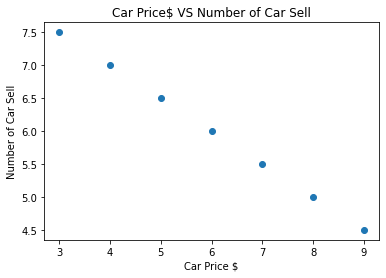

In [14]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

number_of_car_sell_array = [7.5,7,6.5,6.0,5.5,5.0,4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epoch 0, loss 9.799057006835938
epoch 50, loss 6.416274547576904
epoch 100, loss 4.335746765136719
epoch 150, loss 2.9298458099365234
epoch 200, loss 1.979819416999817
epoch 250, loss 1.3378469944000244
epoch 300, loss 0.9040396809577942
epoch 350, loss 0.6108970642089844
epoch 400, loss 0.41280871629714966
epoch 450, loss 0.27895215153694153
epoch 500, loss 0.18849945068359375
epoch 550, loss 0.12737667560577393
epoch 600, loss 0.0860736146569252
epoch 650, loss 0.05816349387168884
epoch 700, loss 0.03930353745818138
epoch 750, loss 0.02655928023159504
epoch 800, loss 0.017947020009160042
epoch 850, loss 0.012127491645514965
epoch 900, loss 0.008195132948458195
epoch 950, loss 0.005537779536098242
epoch 1000, loss 0.0037421199958771467


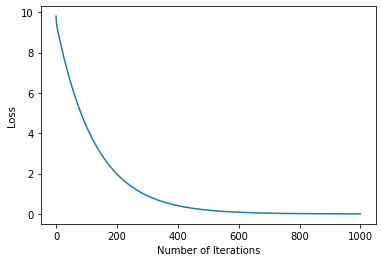

In [15]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
  optimizer.zero_grad()

  results = model(car_price_tensor)

  loss = mse(results, number_of_car_sell_tensor)

  loss.backward()

  optimizer.step()

  loss_list.append(loss.data)

  if(iteration % 50 == 0):
    print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

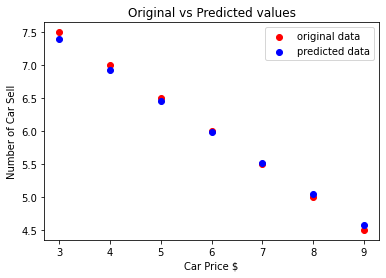

In [16]:
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label="original data", color="red")
plt.scatter(car_prices_array,predicted,label="predicted data",color="blue")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

##Logistic Regression

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

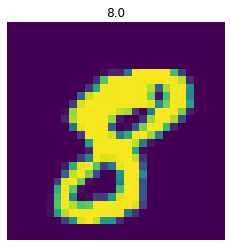

In [24]:
train = pd.read_csv(r"./train.csv", dtype=np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values / 255

features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42)

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig("graph.png")
plt.show()

In [25]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()

    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()

    outputs = model(train)

    loss = error(outputs, labels)

    loss.backward()

    optimizer.step()

    count += 1

    if count % 50 == 0:
      correct = 0
      total = 0
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))

        outputs = model(test)

        predicted = torch.max(outputs.data, 1)[1]

        total += len(labels)

        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)

    if count % 500 == 0:
      print("Iteration: {} Loss: {} Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.5772340297698975 Accuracy: 85.9047622680664%
Iteration: 1000 Loss: 0.6624728441238403 Accuracy: 86.07142639160156%
Iteration: 1500 Loss: 0.4839218258857727 Accuracy: 86.17857360839844%
Iteration: 2000 Loss: 0.583400547504425 Accuracy: 86.3452377319336%
Iteration: 2500 Loss: 0.5320368409156799 Accuracy: 86.44047546386719%
Iteration: 3000 Loss: 0.4071768522262573 Accuracy: 86.54762268066406%
Iteration: 3500 Loss: 0.5384887456893921 Accuracy: 86.70237731933594%
Iteration: 4000 Loss: 0.39599114656448364 Accuracy: 86.75%
Iteration: 4500 Loss: 0.7060171365737915 Accuracy: 86.8452377319336%
Iteration: 5000 Loss: 0.5236248970031738 Accuracy: 87.03571319580078%
Iteration: 5500 Loss: 0.5125189423561096 Accuracy: 87.07142639160156%
Iteration: 6000 Loss: 0.6553799510002136 Accuracy: 87.14286041259766%
Iteration: 6500 Loss: 0.44657301902770996 Accuracy: 87.16666412353516%
Iteration: 7000 Loss: 0.526923418045044 Accuracy: 87.32142639160156%
Iteration: 7500 Loss: 0.460675060749

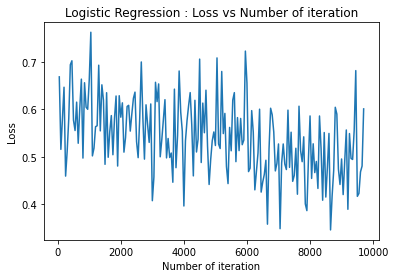

In [30]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression : Loss vs Number of iteration")
plt.show()

##Artifical Neural Network (ANN)

In [31]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [32]:
class ANNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()

    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.relu1 = nn.ReLU()

    self.fc2 = nn.Linear(hidden_dim, hidden_dim)
    self.tanh2 = nn.Tanh()

    self.fc3 = nn.Linear(hidden_dim, hidden_dim)
    self.elu3 = nn.ELU()

    self.fc4 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu1(out)

    out = self.fc2(out)
    out = self.tanh2(out)

    out = self.fc3(out)
    out = self.elu3(out)

    out = self.fc4(out)
    return out

input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()

    outputs = model(train)

    loss = error(outputs, labels)

    loss.backward()

    optimizer.step()

    count += 1

    if count % 50 == 0:
      correct = 0
      total = 0
      for images, labels in test_loader:
        test = Variable(images.view(-1, 28*28))

        outputs = model(test)

        predicted = torch.max(outputs.data, 1)[1]

        total += len(labels)

        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count % 500 == 0:
      print("Iteration: {} Loss: {} Accuracy: {} %".format(count,loss.data, accuracy))

Iteration: 500 Loss: 0.7678138613700867 Accuracy: 79.69047546386719
Iteration: 1000 Loss: 0.4403027296066284 Accuracy: 87.85713958740234
Iteration: 1500 Loss: 0.22873422503471375 Accuracy: 89.38095092773438
Iteration: 2000 Loss: 0.31737062335014343 Accuracy: 90.55952453613281
Iteration: 2500 Loss: 0.3142634332180023 Accuracy: 91.91666412353516
Iteration: 3000 Loss: 0.13101139664649963 Accuracy: 92.71428680419922
Iteration: 3500 Loss: 0.2579497694969177 Accuracy: 93.45237731933594
Iteration: 4000 Loss: 0.06563959270715714 Accuracy: 93.98809814453125
Iteration: 4500 Loss: 0.3197892904281616 Accuracy: 94.45237731933594
Iteration: 5000 Loss: 0.1001601442694664 Accuracy: 94.78571319580078
Iteration: 5500 Loss: 0.21619422733783722 Accuracy: 95.0
Iteration: 6000 Loss: 0.18377359211444855 Accuracy: 95.17857360839844
Iteration: 6500 Loss: 0.09549741446971893 Accuracy: 95.46428680419922
Iteration: 7000 Loss: 0.11501016467809677 Accuracy: 95.77381134033203
Iteration: 7500 Loss: 0.1163225919008255

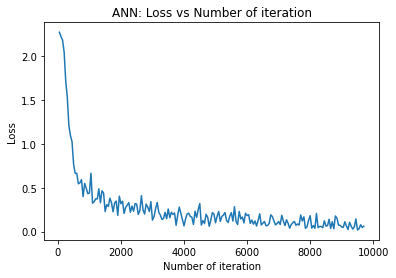

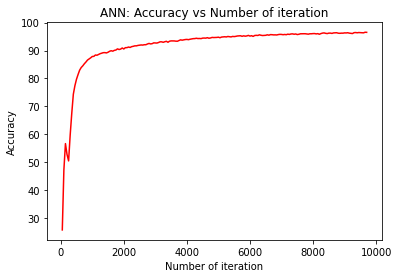

In [34]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

plt.plot(iteration_list, accuracy_list, color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

##Convolutional Neural Network (CNN)

In [35]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [36]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()

    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
    self.relu1 = nn.ReLU()

    self.maxpool1 = nn.MaxPool2d(kernel_size=2)

    self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
    self.relu2 = nn.ReLU()

    self.maxpool2 = nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(32 * 4 * 4, 10)

  def forward(self, x):
    out = self.cnn1(x)
    out = self.relu1(out)

    out = self.maxpool1(out)

    out = self.cnn2(out)
    out = self.relu2(out)

    out = self.maxpool2(out)

    out = out.view(out.size(0), -1)

    out = self.fc1(out)

    return out

batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

model = CNNModel()

error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [37]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    optimizer.zero_grad()

    outputs = model(train)

    loss = error(outputs, labels)

    loss.backward()

    optimizer.step()

    count += 1

    if count % 50 == 0:
      correct = 0
      total = 0
      for images, labels in test_loader:
        test = Variable(images.view(100, 1, 28, 28))

        outputs = model(test)

        predicted = torch.max(outputs.data, 1)[1]

        total += len(labels)

        correct += (predicted == labels).sum()

      accuracy = 100 * correct / float(total)

      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if count % 500 == 0:
      print("Iteration: {} Loss: {} Accuracy: {} %".format(count, loss.data, accuracy))

Iteration: 500 Loss: 0.09289906173944473 Accuracy: 96.64286041259766 %
Iteration: 1000 Loss: 0.0389801487326622 Accuracy: 97.6547622680664 %
Iteration: 1500 Loss: 0.0271344892680645 Accuracy: 97.78571319580078 %
Iteration: 2000 Loss: 0.018469313159585 Accuracy: 98.30952453613281 %


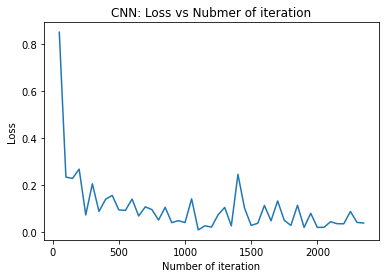

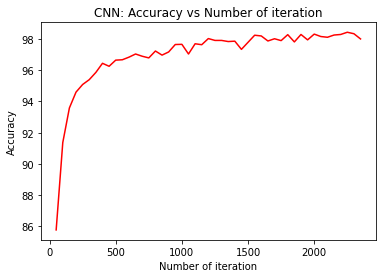

In [38]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Nubmer of iteration")
plt.show()

plt.plot(iteration_list, accuracy_list, color='red')
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()